## SETUP PACKAGES

In [163]:
%pip install scipy==1.11.4
%pip install dalex
%pip install scikit-plot
%pip install shap
%pip install lime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [164]:
# import pandas for data wrangling
import pandas as pd
pd.set_option('display.max_columns', None)
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import Encoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

## Load Dataset

In [165]:
df = pd.read_csv("bank_churn_data.csv")
df.sample(10)

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
6466,715510683,Existing Customer,40,F,1,High School,Single,Less than $40K,Blue,29,3,2,2,2506.00,1362,1144.00,0.84,4665,82,0.74,0.54
6425,720933408,Existing Customer,56,F,2,Uneducated,Unknown,Less than $40K,Blue,36,3,1,2,8438.00,1825,6613.00,0.59,4798,89,0.71,0.22
2499,769980333,Existing Customer,36,M,1,Uneducated,Single,$80K - $120K,Blue,30,4,2,5,13005.00,2152,10853.00,1.42,3023,53,0.77,0.17
1850,716686158,Existing Customer,59,F,0,Post-Graduate,Married,Less than $40K,Blue,49,5,2,3,1479.00,601,878.00,0.61,1621,32,0.60,0.41
2483,720706008,Existing Customer,30,M,2,Post-Graduate,Single,$40K - $60K,Blue,16,5,3,5,4533.00,1977,2556.00,0.66,2679,69,0.60,0.44
9419,710663508,Existing Customer,42,M,4,Uneducated,Married,$40K - $60K,Blue,33,1,2,2,3108.00,2280,828.00,0.84,14763,99,0.80,0.73
7563,714869958,Existing Customer,55,M,2,Uneducated,Single,$120K +,Blue,36,6,2,3,29795.00,2364,27431.00,0.76,3949,71,0.92,0.08
5365,721366308,Existing Customer,50,M,3,Unknown,Single,$40K - $60K,Blue,39,4,3,1,13509.00,2060,11449.00,0.73,3702,64,0.83,0.15
5982,798786333,Existing Customer,46,F,2,Graduate,Married,Less than $40K,Blue,40,6,4,2,1438.30,510,928.30,0.71,3399,66,0.78,0.35
2160,720639783,Existing Customer,35,F,1,Uneducated,Single,Unknown,Silver,27,4,3,2,34516.00,0,34516.00,0.68,2562,62,0.72,0.00


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

### Metadata

- user_id: customer account number.
- attrition_flag: customer status (Existing and Attrited).
- customer_age: age of the customer.
- gender: gender of customer (M for male and F for female).
- dependent_count: number of dependents of customers.
- education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).
- marital_status: customer's marital status (Single, Married, Divorced, and Unknown).
- income_category: customer income interval category (Less than $40K, $40K-$60k, $60K-$80K, $80K-$120K, $120K +, and Unknown).
- card_category: type of card used (Blue, Silver, Gold, and Platinum).
- months_on_book: period of being a customer (in months).
- total_relationship_count: the number of products used by customers in the bank.
- months_inactive_12_mon: period of inactivity for the last 12 months.
- contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.
- credit_limit: credit card transaction nominal limit in one period.
- total_revolving_bal: total funds used in one period.
- avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.
- total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.
- total_trans_amt: total nominal transaction in the last 12 months.
- total_trans_ct: the number of transactions in the last 12 months.
- total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.
- avg_utilization_ratio: percentage of credit card usage.

### Objectives

Stakeholders menginginkan kita untuk menjelaskan distribusi usia, korelasi antara tingkat pendidikan dan pendapatan, serta faktor-faktor lain yang dapat memengaruhi churn.

## Data Cleaning

In [167]:
df.isnull().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [168]:
df.duplicated().sum()

0

In [169]:
#Drop Unused Column
df = df.drop("user_id", axis=1)

## Simple EDA

**Analisa beberapa pertanyaan berikut berdasarkan data yang diberikan:**
1. Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?
2. Apakah terdapat korelasi antara tingkat pendidikan dan income category? Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?
3. Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?
4. Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?
5. Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?


**Analisa Distribusi Target**

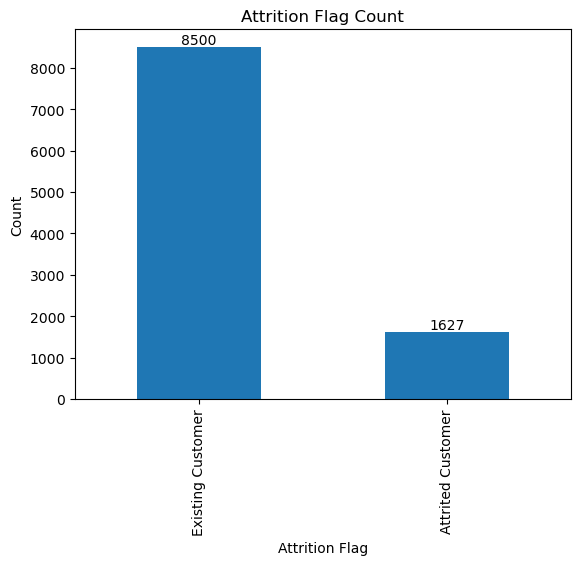

In [170]:
# Target distribution bar chart
ax = df['attrition_flag'].value_counts().plot(kind='bar')

# Set labels and title
ax.set_xlabel('Attrition Flag')
ax.set_ylabel('Count')
ax.set_title('Attrition Flag Count')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.show()

In [171]:
df['attrition_flag'].value_counts()/len(df)*100

attrition_flag
Existing Customer   83.93
Attrited Customer   16.07
Name: count, dtype: float64

Terdapat ketidakseimbangan data target, hanya terdapat 16% customer yang churn

**Analisa Distribusi Usia**

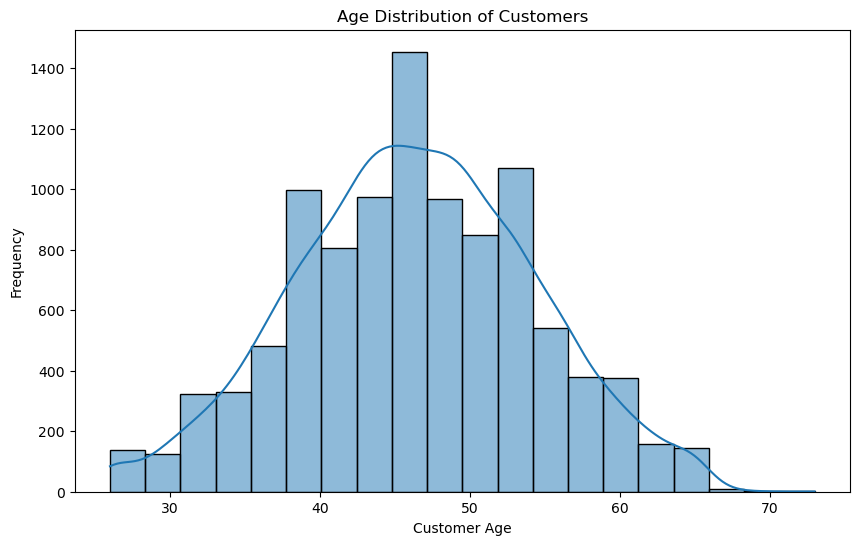

In [172]:
# distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=20, kde=True)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers')
plt.show()

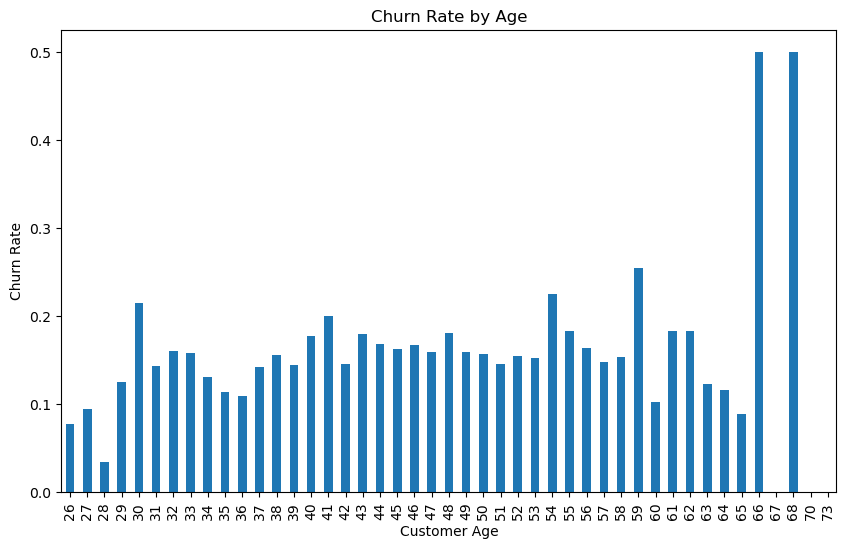

In [173]:
# Menganalisis proporsi churn berdasarkan kelompok usia
age_churn = df.groupby('customer_age')['attrition_flag'].value_counts(normalize=True).unstack()['Attrited Customer']
plt.figure(figsize=(10, 6))
age_churn.plot(kind='bar')
plt.xlabel('Customer Age')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age')
plt.show()

- distribusi usia terpantau memiliki normal distribution
- Churn toba-tiba meninggi setelah melewati usia 66 tahun

In [174]:
def countplot(column):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x=column, data=df, hue="attrition_flag",palette="Blues")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height() 
        ax.annotate(percentage, (x,y))
        
    plt.title(f"Customer Churned by {column}")
    plt.show()

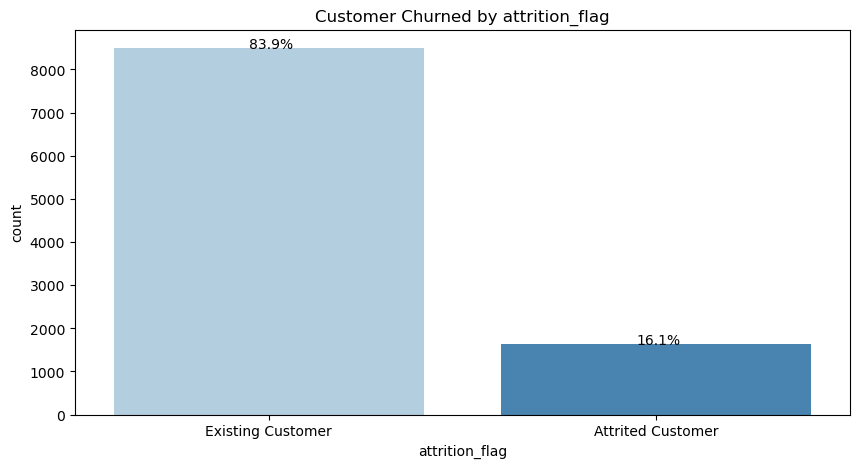

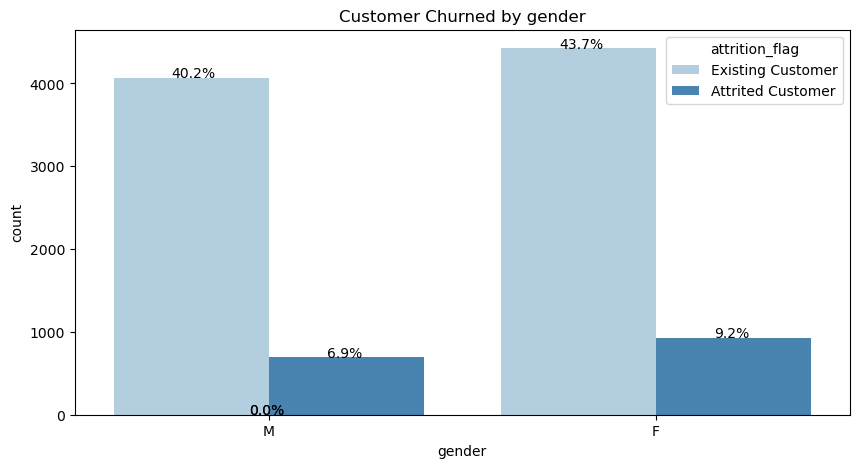

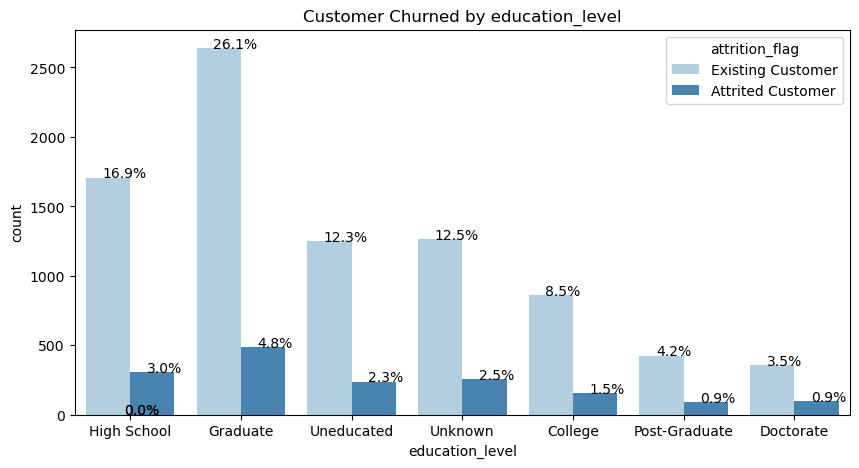

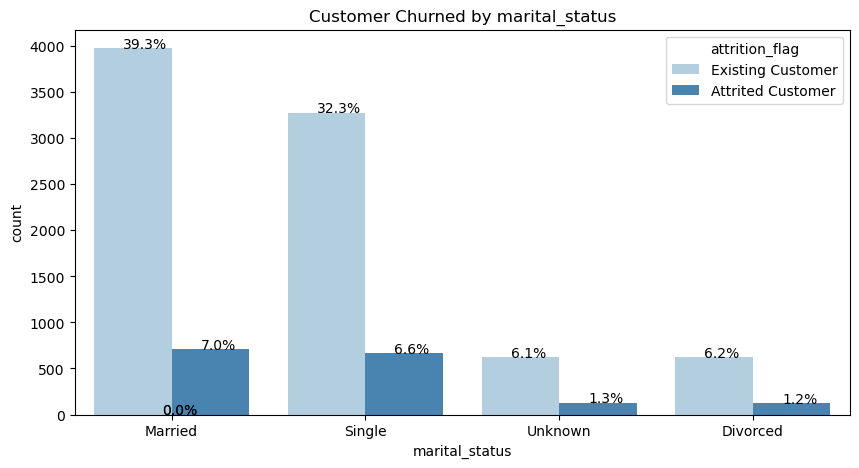

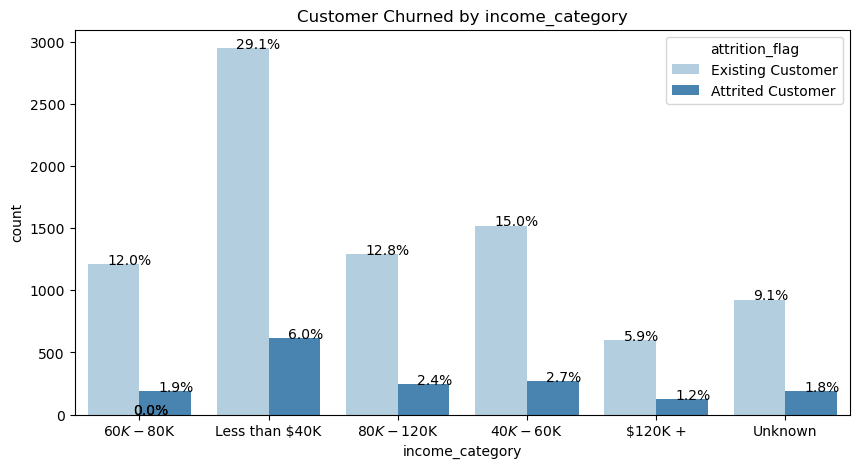

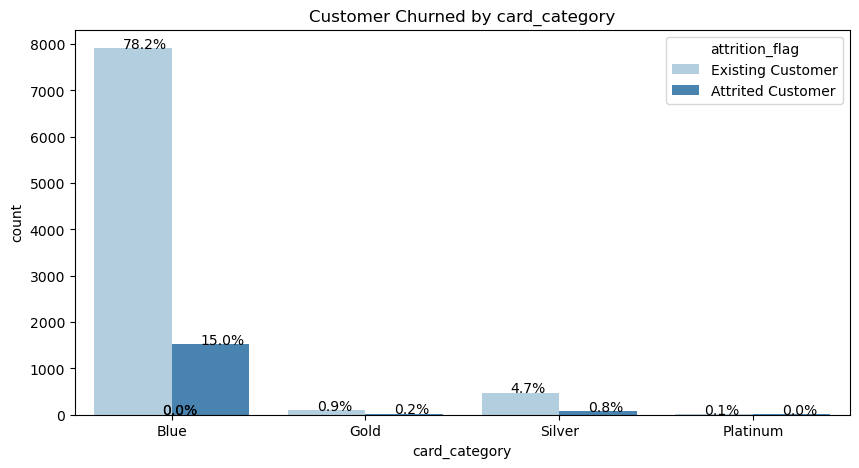

In [175]:
# Categorical Column Distribution
for col in df.select_dtypes(include='object').columns:
    countplot(col)

- Pembagian Gender cukup fair
- Edukasi tertinggi adalah Graduate, disusul High School
- Marital Status antara married dan single cukup seimbang, divorced cukup kecil
- income_category didominasi pendapatan <40k , disusul oleh 40-60k.
- pengguna kartu mayoritas memilih blue card.

Looks like we're gonna used all the rest of the columns, but we have to do one-hot encoding to marital status

In [176]:
status = pd.get_dummies(df['marital_status'],prefix='status')

status = status.astype(int)

In [177]:
df = pd.concat([df, status], axis=1)
df.drop(columns='marital_status', inplace=True)

df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,status_Divorced,status_Married,status_Single,status_Unknown
0,Existing Customer,45,M,3,High School,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,0,1,0,0
1,Existing Customer,49,F,5,Graduate,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,0,0,1,0
2,Existing Customer,51,M,3,Graduate,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0,1,0,0
3,Existing Customer,40,F,4,High School,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,0,0,0,1
4,Existing Customer,40,M,3,Uneducated,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00,0,1,0,0


## Data Split

In [178]:
# Feature and Target Split
X = df.drop(["attrition_flag"], axis=1)
y = df["attrition_flag"]

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y, random_state= 42)

In [179]:
X_train.shape

(8101, 22)

In [180]:
X_test.shape

(2026, 22)

In [181]:
y_train.value_counts()

attrition_flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64

In [182]:
y_test.value_counts()

attrition_flag
Existing Customer    1701
Attrited Customer     325
Name: count, dtype: int64

In [183]:
X_train['card_category'].unique()

array(['Blue', 'Silver', 'Gold', 'Platinum'], dtype=object)

## Exploratory Data Analysis

### Encoding

In [184]:
# Ordinal Encoding
income_category = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K' : 3,
    '$80K - $120K' : 4,
    '$120K +' : 5
}
education_level = {
    'Unknown' : 0,
    'Uneducated': 1,
    'High School': 2,
    'Graduate': 3,
    'College': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}
card_category = {
    'Blue': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4,
}

# Mapping ordinal encoding ke kolom
X_train['income_category'] = X_train['income_category'].map(income_category)
X_test['income_category'] = X_test['income_category'].map(income_category)
X_train['education_level'] = X_train['education_level'].map(education_level)
X_test['education_level'] = X_test['education_level'].map(education_level)
X_train['card_category'] = X_train['card_category'].map(card_category)
X_test['card_category'] = X_test['card_category'].map(card_category)

In [185]:
# Label Encoding
le = LabelEncoder()

X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.fit_transform(X_test['gender'])

In [186]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [187]:
X_train.head()

,customer_age,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,status_Divorced,status_Married,status_Single,status_Unknown
1602,54,0,3,4,0,1,49,6,2,3,13184.00,0,13184.00,1.17,2047,33,0.18,0.00,0,0,1,0
7791,51,1,0,2,4,1,45,3,2,3,10648.00,2517,8131.00,0.71,4930,89,0.98,0.24,0,0,1,0
7177,45,0,4,2,2,1,29,3,2,1,4595.00,1781,2814.00,0.71,3746,68,0.55,0.39,0,0,1,0
97,53,1,3,6,2,1,35,5,3,2,3789.00,1706,2083.00,1.05,1609,42,0.68,0.45,0,1,0,0
4820,48,0,2,3,0,1,40,3,2,4,5104.00,736,4368.00,0.68,3943,78,0.70,0.14,0,1,0,0


### Menjawab Pertanyaan Boss

In [188]:
target = pd.DataFrame(y_train, columns=['existing_customer'])

In [189]:
df_corr = pd.concat([X_train, target], axis=1)

In [190]:
df_corr =  df_corr.fillna(0)

**Korelasi Education Level dan Churn**

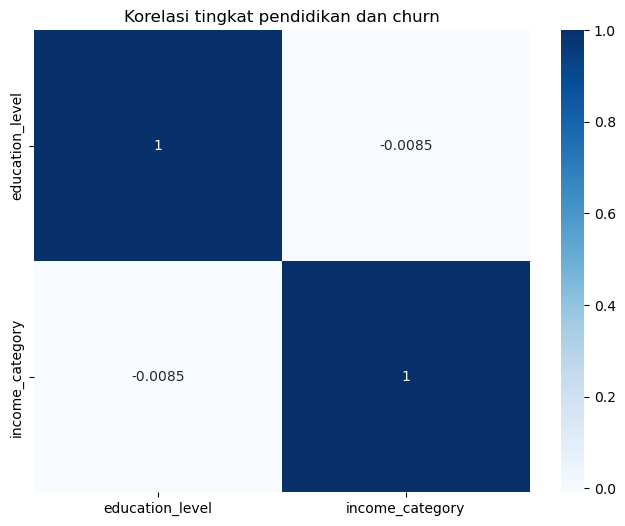

In [191]:
# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(X_train[['education_level', 'income_category']].corr(), annot=True, cmap='Blues')
plt.title('Korelasi tingkat pendidikan dan churn')
plt.show()

GAADA HUBUNGAN ANTARA MEREKA

**Gender dan Churn analysis**

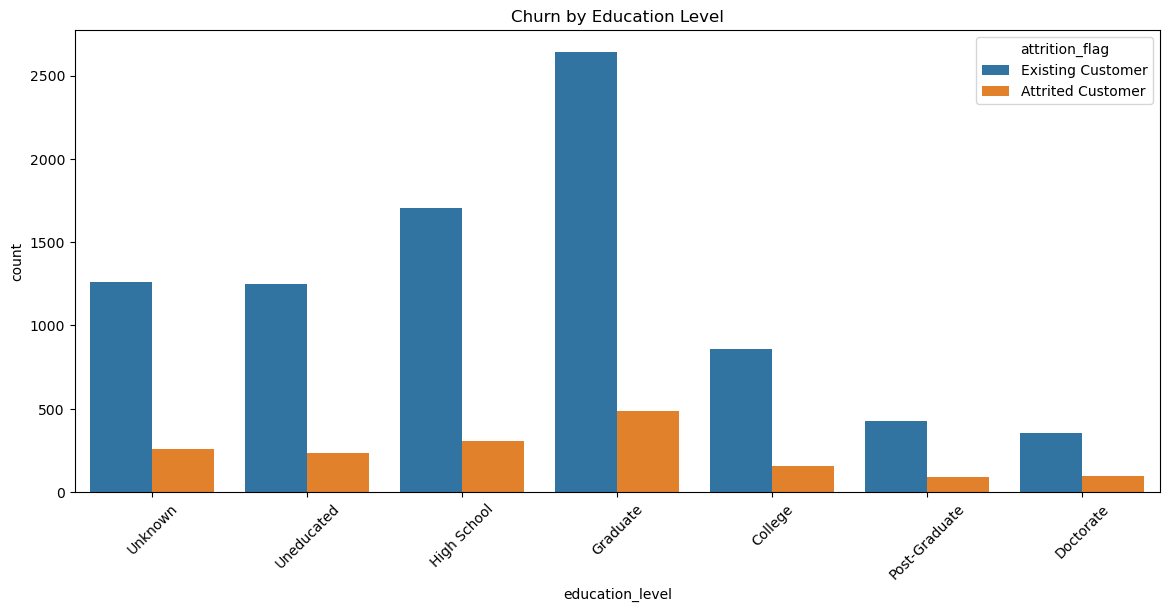

In [192]:
plt.figure(figsize=(14, 6))
sns.countplot(x='education_level', hue='attrition_flag', data=df, order=education_level)
plt.title('Churn by Education Level')
plt.xticks(rotation=45)
plt.show()

Tidak ada perbedaan yang sangat signifikan antar level edukasi dengan churn, semakin banyak Existing Customer pada level edukasi sejalan dengan tingginya churn.

**Churn berdasarkan Gender**

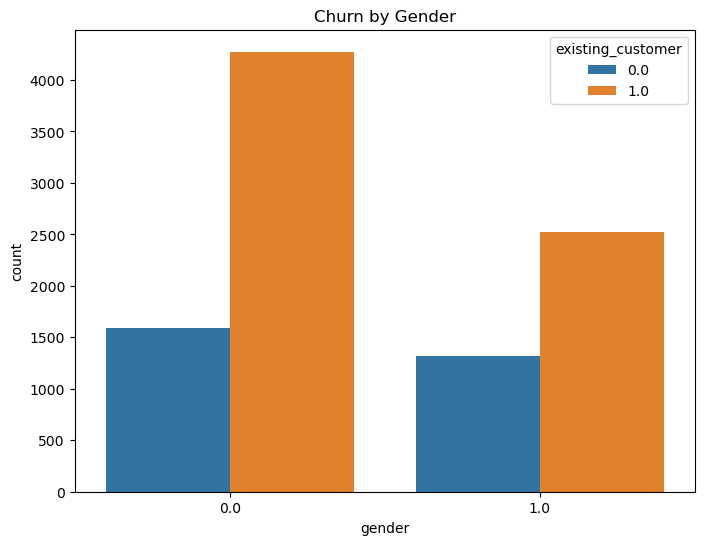

In [193]:
# Countplot untuk churn berdasarkan gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='existing_customer', data=df_corr)
plt.title('Churn by Gender')
plt.show()

Keduanya hampir sama antara churn dan stay

**Korelasi antara Lama Menjadi Nasabah dengan Churn**

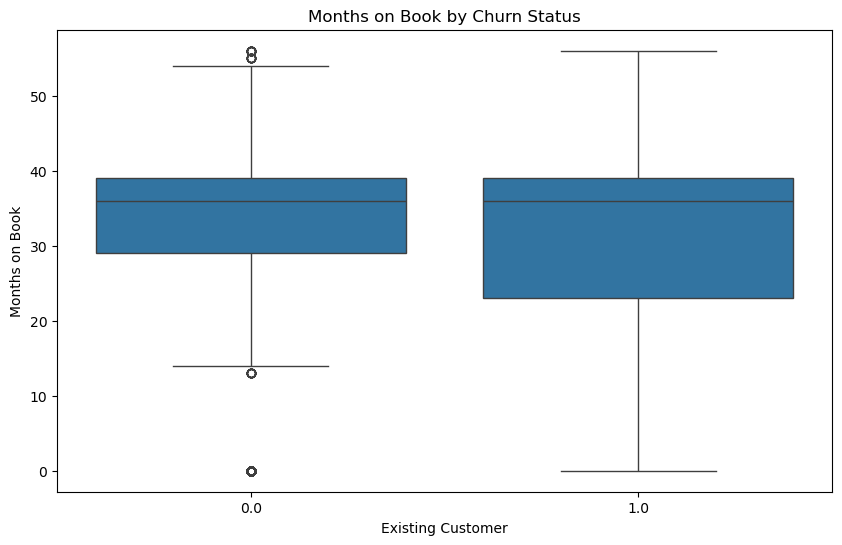

In [194]:
# Scatter plot atau regresi sederhana
plt.figure(figsize=(10, 6))
sns.boxplot(x='existing_customer', y='months_on_book', data=df_corr)
plt.xlabel('Existing Customer')
plt.ylabel('Months on Book')
plt.title('Months on Book by Churn Status')
plt.show()

Persebaran Bulan terlihat tidak signifikan memberi dampak terhadap churn

**Interaksi dengan Bank terhadap Churn**

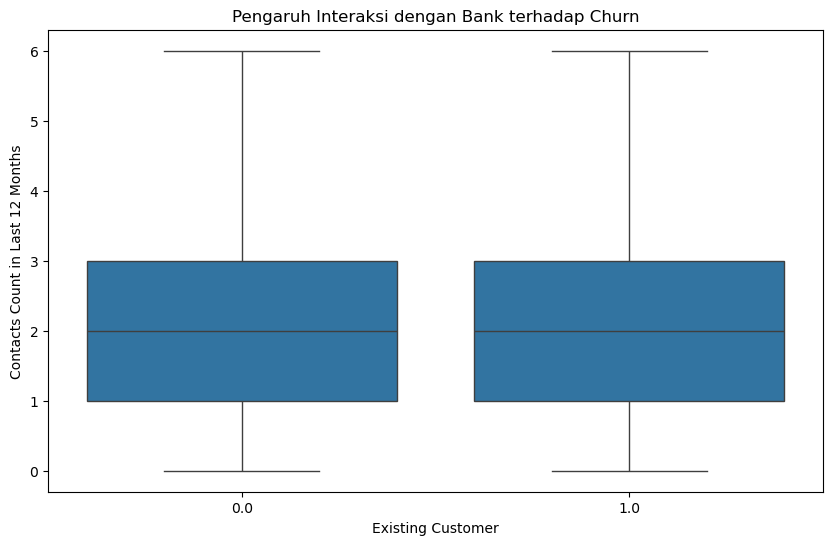

In [195]:
# Box plot untuk melihat churn berdasarkan jumlah interaksi
plt.figure(figsize=(10, 6))
sns.boxplot(x='existing_customer', y='contacts_count_12_mon', data=df_corr)
plt.xlabel('Existing Customer')
plt.ylabel('Contacts Count in Last 12 Months')
plt.title('Pengaruh Interaksi dengan Bank terhadap Churn')
plt.show()

Median jumlah kontak untuk nasabah yang tidak churn (1) lebih rendah daripada yang churn (0). Ini menunjukkan bahwa nasabah yang lebih sering berinteraksi dengan bank dalam setahun terakhir cenderung lebih mungkin untuk churn.

### Multicollinearity Check

In [196]:
# heatmap correlation
corr = df_corr.corr().style.background_gradient(cmap='coolwarm')
corr

,customer_age,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,status_Divorced,status_Married,status_Single,status_Unknown,existing_customer
customer_age,1.000000,0.324586,0.505403,0.480788,0.467226,0.729565,0.955614,0.648823,0.649464,0.611513,0.331230,0.468132,0.290848,0.737688,0.413167,0.669562,0.708998,0.350046,0.087288,0.341609,0.280513,0.095672,-0.116918
gender,0.324586,1.000000,0.216184,0.182559,0.815923,0.333658,0.314583,0.262334,0.241269,0.269076,0.496582,0.209760,0.484308,0.304873,0.178494,0.222491,0.271650,-0.084466,0.029211,0.132066,0.103121,0.057783,-0.076552
dependent_count,0.505403,0.216184,1.000000,0.309304,0.343740,0.492529,0.479988,0.399224,0.404232,0.370645,0.270333,0.295368,0.245880,0.464487,0.294643,0.471583,0.461052,0.199229,0.064151,0.225504,0.150821,0.100796,-0.095192
education_level,0.480788,0.182559,0.309304,1.000000,0.254490,0.426857,0.463276,0.369195,0.360861,0.344805,0.187926,0.257321,0.165827,0.417694,0.235493,0.386625,0.390284,0.191549,0.061802,0.197541,0.151111,0.049815,-0.057933
income_category,0.467226,0.815923,0.343740,0.254490,1.000000,0.442807,0.448058,0.354936,0.334673,0.350931,0.570640,0.280051,0.552709,0.410724,0.241981,0.339415,0.376484,-0.011549,0.041932,0.189936,0.140678,0.070479,-0.094963
card_category,0.729565,0.333658,0.492529,0.426857,0.442807,1.000000,0.697103,0.527495,0.538081,0.533587,0.562239,0.416599,0.530773,0.652812,0.476339,0.649598,0.614759,0.188383,0.086607,0.254271,0.271385,0.103727,-0.186857
months_on_book,0.955614,0.314583,0.479988,0.463276,0.448058,0.697103,1.000000,0.618508,0.628676,0.583383,0.316492,0.444343,0.278197,0.704500,0.392686,0.639987,0.675232,0.327215,0.085701,0.323094,0.269324,0.090941,-0.107697
total_relationship_count,0.648823,0.262334,0.399224,0.369195,0.354936,0.527495,0.618508,1.000000,0.483356,0.500247,0.211361,0.363084,0.179279,0.600895,0.115805,0.416508,0.564775,0.307930,0.079950,0.265485,0.208120,0.070569,0.144744
months_inactive_12_mon,0.649464,0.241269,0.404232,0.360861,0.334673,0.538081,0.628676,0.483356,1.000000,0.475613,0.227551,0.322093,0.199761,0.548526,0.291030,0.487903,0.515315,0.258666,0.078078,0.239675,0.218325,0.072630,-0.091888
contacts_count_12_mon,0.611513,0.269076,0.370645,0.344805,0.350931,0.533587,0.583383,0.500247,0.475613,1.000000,0.256472,0.297983,0.231530,0.532811,0.236616,0.423145,0.470429,0.212197,0.071401,0.237082,0.212849,0.067685,-0.047475


Tidak ada satupun yang memiliki korelasi tinggi dengan churn

Multicol Columns (above 60%) = '`months_on_book`', '`income_category`', '`gender`', '`customer_age`', '`total_trans_amt`', `status_married`, `avg_utilization_ratio`, `avg_open_to_buy`

In [197]:
drop_columns = ['months_on_book', 'income_category', 'gender', 'customer_age', 'total_trans_amt', 'total_trans_ct',
                'status_Married', 'avg_utilization_ratio', 'avg_open_to_buy']
X_train = X_train.drop(drop_columns, axis = 1)

# drop certain column in test data
X_test = X_test.drop(drop_columns, axis = 1)

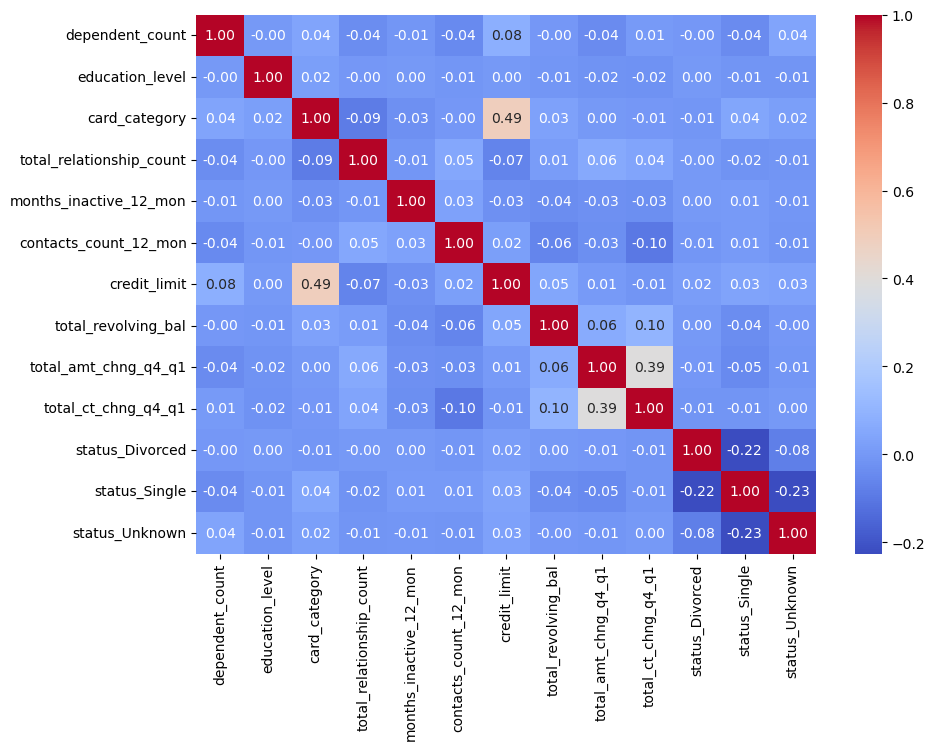

In [198]:
# heatmap correlation
corr = X_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap="coolwarm")
plt.show()

It's Clean now

In [199]:
# pull numerical column
var_name = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [200]:
var_name

Index(['dependent_count', 'education_level', 'card_category',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'status_Divorced',
       'status_Single', 'status_Unknown'],
      dtype='object')

### Outlier Check

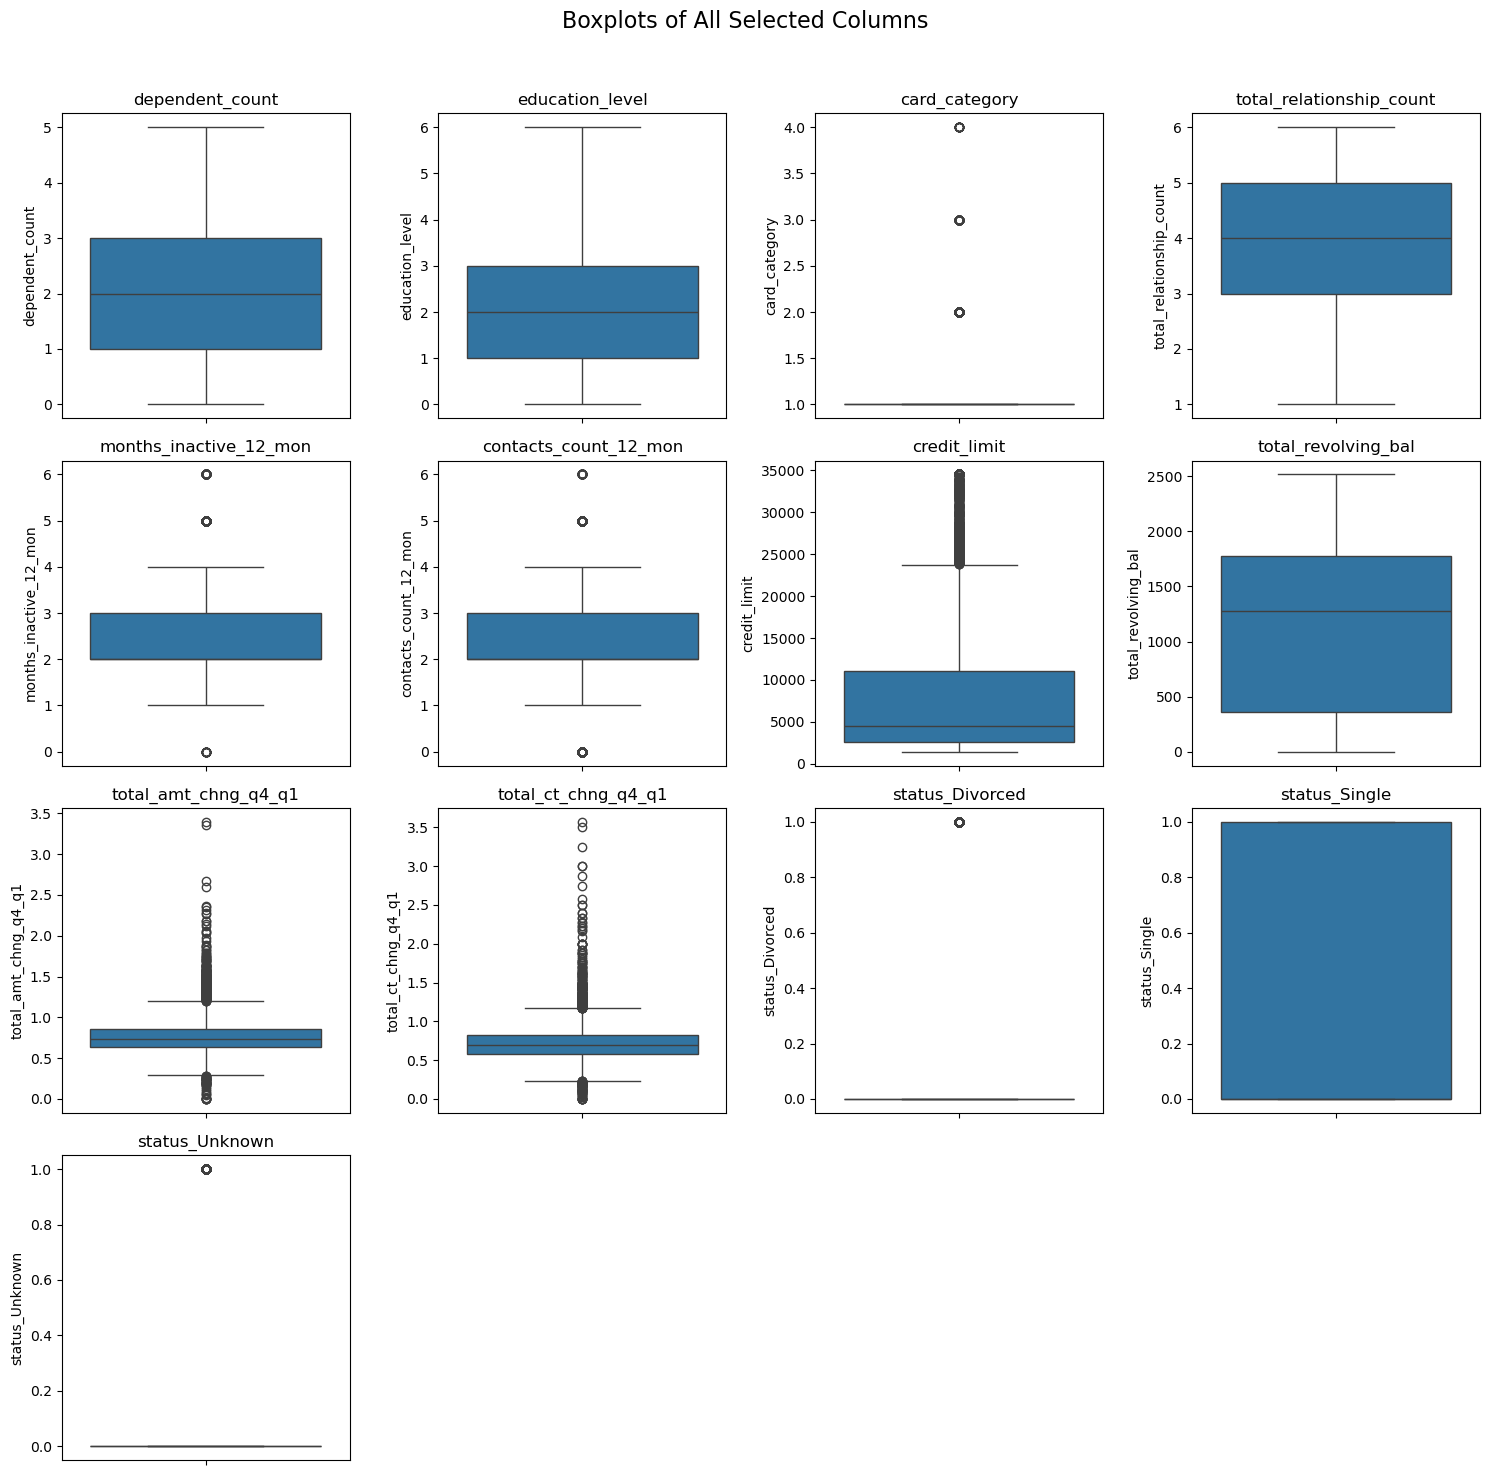

In [201]:
columns = list(X_train.columns)
# Setting up the figure size and grid
plt.figure(figsize=(15, 15))
plt.suptitle("Boxplots of All Selected Columns", fontsize=16)

# Loop through the columns and plot each one as a boxplot
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)  # 4x4 grid, adjust if you need a different layout
    sns.boxplot(y=X_train[col])
    plt.title(col)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()

In [202]:
'''for col in ['credit_limit','total_amt_chng_q4_q1', 'total_ct_chng_q4_q1']:
    # Apply log1p (log(x + 1)) to avoid log(0) issues
    X_train[col] = np.log1p(X_train[col])'''

"for col in ['credit_limit','total_amt_chng_q4_q1', 'total_ct_chng_q4_q1']:\n    # Apply log1p (log(x + 1)) to avoid log(0) issues\n    X_train[col] = np.log1p(X_train[col])"

In [203]:
'''#Robust Scaling to reduce the impact of outliers on model performance
from sklearn.preprocessing import RobustScaler

transform = ['credit_limit','total_amt_chng_q4_q1', 'total_ct_chng_q4_q1']
scaler = RobustScaler()
X_train[transform] = scaler.fit_transform(X_train[transform])'''

"#Robust Scaling to reduce the impact of outliers on model performance\nfrom sklearn.preprocessing import RobustScaler\n\ntransform = ['credit_limit','total_amt_chng_q4_q1', 'total_ct_chng_q4_q1']\nscaler = RobustScaler()\nX_train[transform] = scaler.fit_transform(X_train[transform])"

In [204]:
'''columns = list(X_train.columns)
# Setting up the figure size and grid
plt.figure(figsize=(15, 15))
plt.suptitle("Boxplots of All Selected Columns", fontsize=16)

# Loop through the columns and plot each one as a boxplot
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)  # 4x4 grid, adjust if you need a different layout
    sns.boxplot(y=X_train[col])
    plt.title(col)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()'''

'columns = list(X_train.columns)\n# Setting up the figure size and grid\nplt.figure(figsize=(15, 15))\nplt.suptitle("Boxplots of All Selected Columns", fontsize=16)\n\n# Loop through the columns and plot each one as a boxplot\nfor i, col in enumerate(columns, 1):\n    plt.subplot(4, 4, i)  # 4x4 grid, adjust if you need a different layout\n    sns.boxplot(y=X_train[col])\n    plt.title(col)\n\n# Adjust layout to avoid overlap\nplt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title\nplt.show()'

In [205]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [206]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Resampling data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas sebelum dan sesudah
print("Distribusi kelas sebelum SMOTE:", pd.Series(y_train).value_counts())
print("Distribusi kelas setelah SMOTE:", pd.Series(y_resampled).value_counts())


Distribusi kelas sebelum SMOTE: 1    6799
0    1302
Name: count, dtype: int64
Distribusi kelas setelah SMOTE: 0    6799
1    6799
Name: count, dtype: int64


## Modeling

**Random Forest Model**

In [ ]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 42,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

In [234]:
# define random forest model
random_forest_clf_balance = RandomForestClassifier(
    random_state = 42,
    n_estimators=100
)
# fit model to training data
random_forest_clf_balance.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

**XGBoost Classifier**


In [235]:
# fit model no training data
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

In [236]:
# fit model no training data
xgb_clf_balance = XGBClassifier(
    random_state = 1000
)

xgb_clf_balance.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

## Model Evaluation

In [237]:
# random forest prediction
rf_pred = random_forest_clf.predict(X_test)
rf_pred_proba = random_forest_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

In [238]:
# random forest prediction
rf_pred_balance = random_forest_clf_balance.predict(X_test)
rf_pred_proba_balance = random_forest_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred_balance = xgb_clf_balance.predict(X_test)
xgb_pred_proba_balance = xgb_clf.predict_proba(X_test)

**Classification Report**

In [239]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.78,0.92,0.90,0.85,0.90
recall,0.54,0.97,0.90,0.76,0.90
f1-score,0.64,0.94,0.90,0.79,0.89
support,325.00,1701.00,0.90,2026.00,2026.00


Akurasi Recall 0 cukup Rendah, 54%

In [241]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred_balance, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.56,0.95,0.87,0.75,0.88
recall,0.73,0.89,0.87,0.81,0.87
f1-score,0.64,0.92,0.87,0.78,0.87
support,325.00,1701.00,0.87,2026.00,2026.00


We have the best model so far, it has 0 Recall 73%

In [242]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred_balance, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.55,0.94,0.86,0.74,0.88
recall,0.72,0.89,0.86,0.80,0.86
f1-score,0.62,0.91,0.86,0.77,0.87
support,325.00,1701.00,0.86,2026.00,2026.00


In [243]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.72,0.92,0.90,0.82,0.89
recall,0.58,0.96,0.90,0.77,0.90
f1-score,0.64,0.94,0.90,0.79,0.89
support,325.00,1701.00,0.90,2026.00,2026.00


**Confusion Matrix**

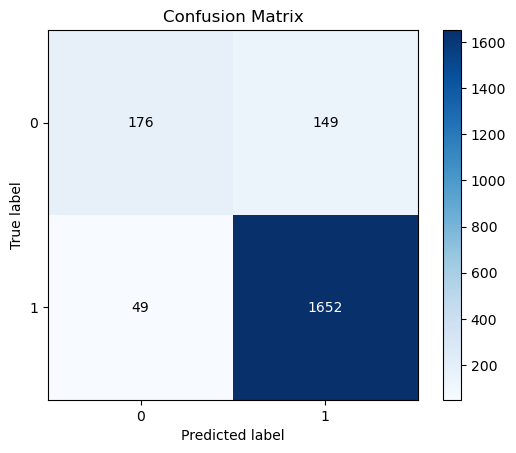

In [244]:
# random forest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

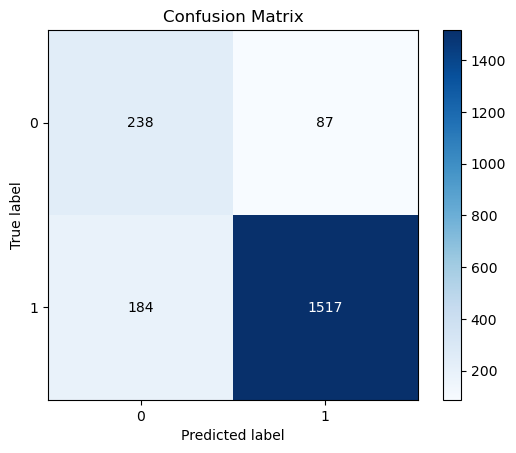

In [247]:
# random forest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred_balance);

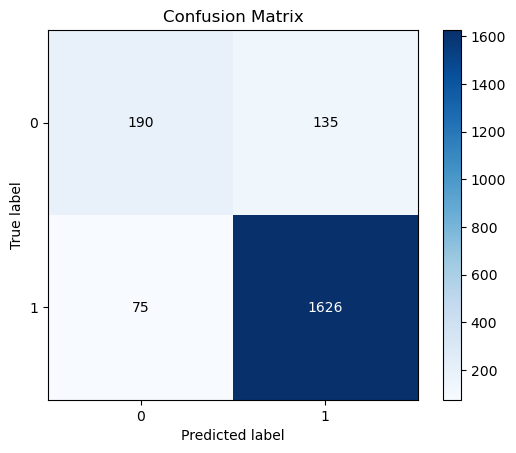

In [245]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

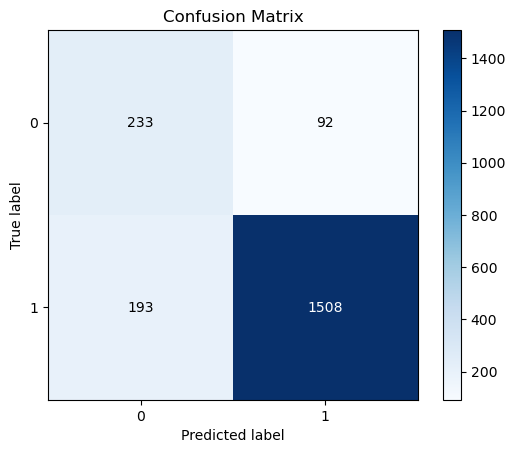

In [248]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred_balance);

Our model just better understand the data.

**ROC-AUC**

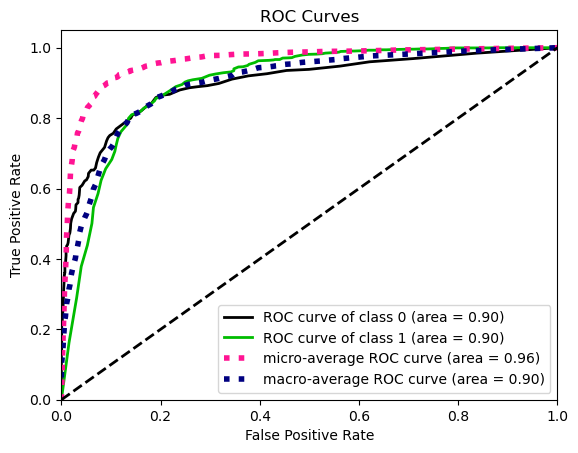

In [246]:
# random forest result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

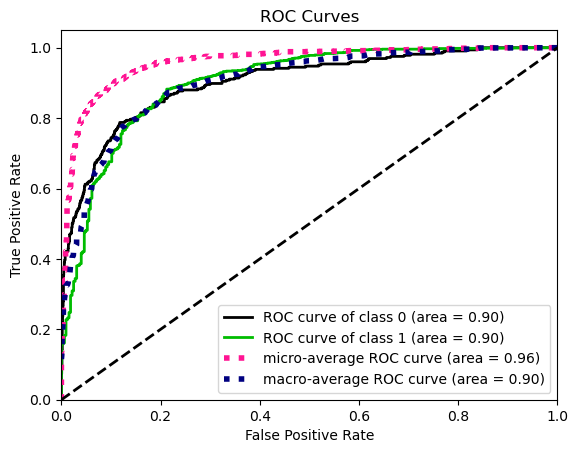

In [220]:
# xgboost result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

In [221]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [222]:
import lazypredict

In [250]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_resampled, X_test, y_resampled, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [01:12<00:02,  2.01s/it]

[LightGBM] [Info] Number of positive: 6799, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 13598, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [01:12<00:00,  2.51s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.86               0.81     0.81      0.86   
RandomForestClassifier             0.87               0.81     0.81      0.87   
BaggingClassifier                  0.84               0.80     0.80      0.85   
XGBClassifier                      0.86               0.80     0.80      0.87   
AdaBoostClassifier                 0.82               0.78     0.78      0.84   
SVC                                0.82               0.76     0.76      0.84   
ExtraTreesClassifier               0.85               0.76     0.76      0.86   
DecisionTreeClassifier             0.79               0.74     0.74      0.81   
Perceptron                         0.75               0.72     0.72      0.78   
NuSVC                              0.81               0.72     0.72      0.82   
LinearSVC                   

## Best Model

In [224]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

lgbm = LGBMClassifier(
    n_estimators=100,     
    learning_rate=0.1,    
    max_depth=-1,         
    random_state=42       
)

# Fit model ke data train
lgbm.fit(X_train, y_train)

# Prediksi pada data test
y_pred = lgbm.predict(X_test)

# Evaluasi dengan classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 6799, number of negative: 1302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.839279 -> initscore=1.652874
[LightGBM] [Info] Start training from score 1.652874
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.59      0.67       325
           1       0.93      0.96      0.94      1701

    accuracy                           0.90      2026
   macro avg       0.84      0.78      0.80      2026
weighted avg       0.90      0.90      0.90      2026



In [249]:
lgbm_balance = LGBMClassifier(
    n_estimators=100,     
    learning_rate=0.1,    
    max_depth=-1,         
    random_state=42       
)

# Fit model ke data train
lgbm_balance.fit(X_resampled , y_resampled)

# Prediksi pada data test
y_pred = lgbm_balance.predict(X_test)

# Evaluasi dengan classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 6799, number of negative: 6799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 13598, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.75      0.63       325
           1       0.95      0.88      0.91      1701

    accuracy                           0.86      2026
   macro avg       0.74      0.81      0.77      2026
weighted avg       0.88      0.86      0.87      2026



**Best Model**
We Choose Light GBM with balance data as our model because it has 75% Accuracy to predict Customer Churn.

## Model Evaluation

Confusion Matrix:
 [[ 245   80]
 [ 212 1489]]


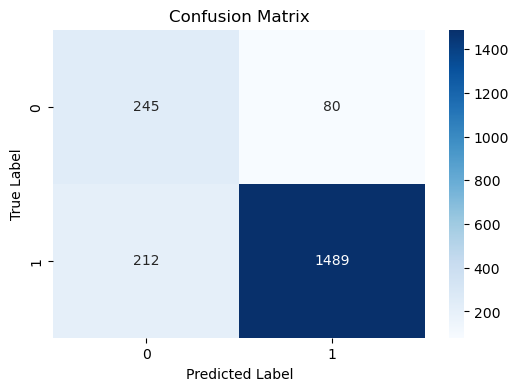

In [251]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Summary

Berdasarkan EDA yang sudah kita lakukan, sulit sekali menemukan metrics apa yang bisa menentukan seseorang Akan Churn.

Gender, Education Level, Lamanya menjadi nasabah hingga Banyaknya interaksi dengan bank tidak mampu memberikan gambaran pasti siapa yang akan churn. Bahkan dengan heatmap dapat terlihat tidak ada satupun fitur yang memiliki korelasi tinggi dengan Churn.

Dengan model yang sudah dibuat, model terbaik dapat memprediksi 59% customer yang akan Churn!. (Dilihat dari poin Recall 0)
Walau tidak terlalu besar, namun lebih baik.

## explanatory model analysis

In [252]:
## initiate explainer for Light GBM model
churn_lgbm_exp = dx.Explainer(lgbm_balance, X_train, y_train, label = "Light GBM Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 13 cols
  -> target variable   : 8101 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : Light GBM Interpretation
  -> predict function  : <function yhat_proba_default at 0x00000295111C0EA0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000591, mean = 0.745, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.968, mean = 0.094, max = 0.97
  -> model_info        : package lightgbm

A new explainer has been created!


### Feature Importance

Kita akan hanya menggunakan model terbaik untuk dilakukan interpretability.
Light GBM

In [253]:
# visualize permutation feature importance for Light GBM model
churn_lgbm_exp.model_parts().plot()

Dapat kita lihat bahwa terdapat beberapa fitur utama yang mempengaruhi Churn :
1. total_revolving_bal (+0.124): Ini adalah fitur yang paling penting dalam model.
2. total_ct_chng_q4_q1 (+0.099): Fitur ini juga memiliki pengaruh yang besar.
3. total_relationship_count (+0.052): lumayan memiliki pengaruh
   
Namun meski begitu, fitur lain juga tetap memliki pengaruh dengan bobotnya masing-masing

### Partial Dependent Plot

In [254]:
# create partial dependence plot of Light GBM model
churn_lgbm_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/13 [00:00<?, ?it/s]

Calculating ceteris paribus: 100%|██████████| 13/13 [00:01<00:00, 11.66it/s]


Kita bahas satu per satu:
1. Dependent, Education level, credit limit dan Card_category memiliki pola yang sama, semakin tinggi ada sedikit kenaikan retensi. (semakin banyak tanggungan, tinggi pendidikan dan card_category platinum sedikit berpengaruh ke arah Retensi)
2. Total_relationship, semakin banyak produk yang digunakan user, semakin menurun kemungkinan churn. Terutama ketika sudah menggunakan 2-3 produk, terdapat kenaikan yang lumayan.
3. months_inactive, sedikit berdampak menaikkan churn rate dengan semakin tingginya inactive
4. contacts_count_12_mon (berpengaruh ke-4) Terlihat bahwa saat jumlah kontak dalam 12 bulan meningkat, probabilitas Churn menurun. (Perlu di verified)
5. total_revolving_bal (paling berpengaruh): Ketika customer sudah menghabiskan lebih dari 500$ uangnya dari kredit card, semakin retensi customer tersebut. Namun ketika sudah melebihi 2000$ mulai terjadi penurunan signifikan ke arah Churn.
6. total_ct_chng_q4_q1 dan total_amt_chng_q4_q1 (berpengaruh 2 & 3): Jika transaksi yang dilakukan dan juga nominalnya bertambah selama peralihan tahun (Q4-Q1). Semakin retensi customer. Terutama ketika melewati 1 poin.
7. Status tidak memiliki dampak yang berarti

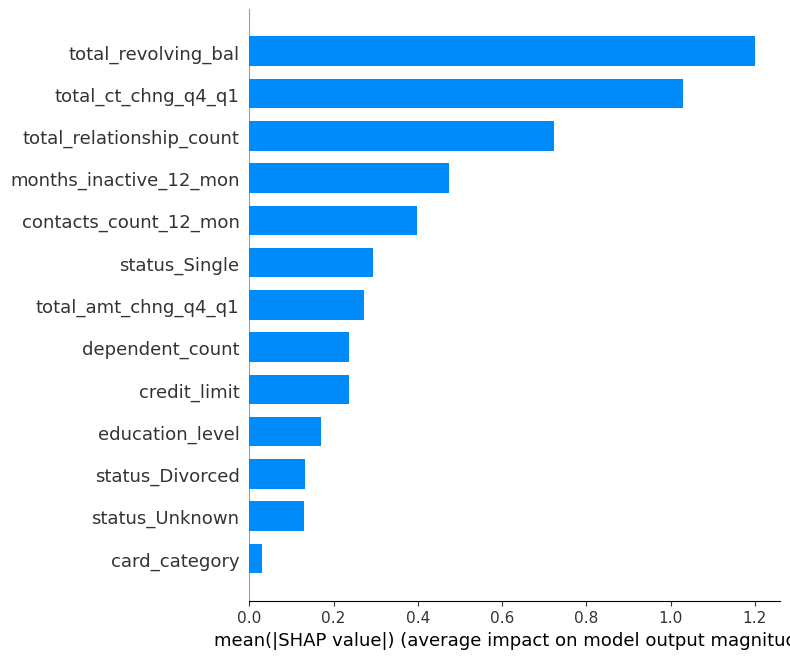

In [256]:
# create SHAP Tree Explainer for XGBoost model with| first 1000 rows of train data
lgbm_shap_values = shap.TreeExplainer(lgbm_balance).shap_values(X_resampled[:1000])

# create SHAP summary plot with next 1000 rows of train data
shap.summary_plot(lgbm_shap_values, X_resampled[1000:2000], plot_type='bar')

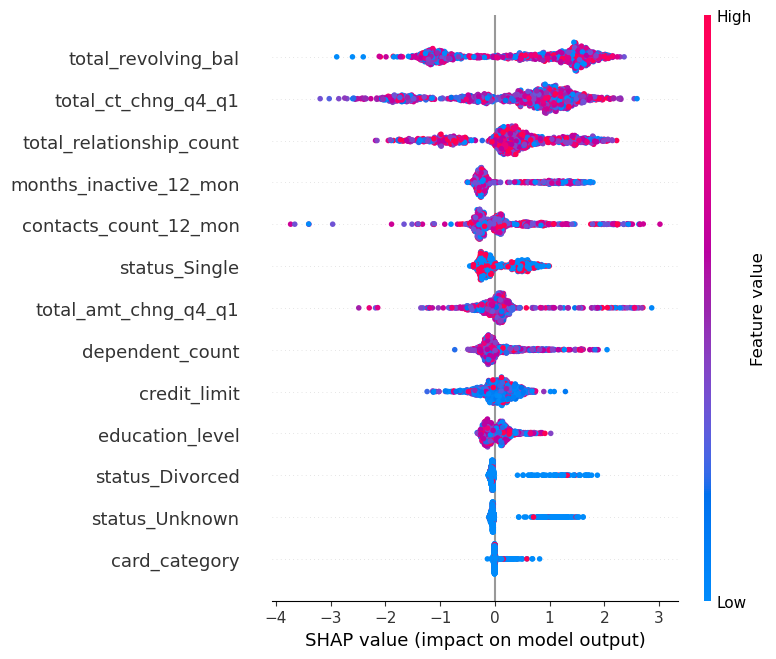

In [257]:
# create SHAP summary plot to visualize impact distribution of next 1000 rows of train data
shap.summary_plot(lgbm_shap_values, X_resampled[1000:2000])

Bro Shap dan Feature Importance bersepakat untuk 3 Fitur paling berpengaruh.
1. total_revolving_bal, total_ct_chng_q4_q1 dan total_relationship_count

In [258]:
# define Random Forest explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_resampled.values,
    feature_names = X_resampled.columns.tolist(),
    class_names = ['churn', 'retained'],
    discretize_continuous = True,
    verbose = True
)

In [264]:
user_id_1 = X_resampled.iloc[14]
user_id_1

dependent_count                3.00
education_level                3.00
card_category                  1.00
total_relationship_count       5.00
months_inactive_12_mon         2.00
contacts_count_12_mon          4.00
credit_limit               34516.00
total_revolving_bal         1662.00
total_amt_chng_q4_q1           0.50
total_ct_chng_q4_q1            0.90
status_Divorced                0.00
status_Single                  0.00
status_Unknown                 0.00
Name: 14, dtype: float64

In [265]:
# explain Random Forest prediction for user_id: 23976
lime_explainer.explain_instance(user_id_1, lgbm_balance.predict_proba).show_in_notebook(show_table=True)

Intercept 0.7526844358822296
Prediction_local [0.86072795]
Right: 0.8859065007462857


## Recommendation

Kami merekomendasikan untuk memberikan **promo pembelian dengan menggunakan kartu kredit ini**, terutama ketika pergantian tahun (q4-q1), karena berdasarkan model predict 2 fitur yang paling berpengaruh, mempertahankan customer berhubungan dengan tingginya uang yg dihabiskan customer dengan credit card ini. Lalu berikutnya, **berikan promo berkelanjutan** dengan belanja diatas nominal sekian akan mendapat diskon untuk bulan setelahnya sekian. Untuk menaikkan tingkat keaktifan customer, ini menjadi salah satu faktor utama juga dalam menjaga retensi.
Cari produk apa yang paling digemari oleh customer yang tidak mampu mereka beli, buat skema pembiayaan terbaik sesuai produknya dan akan menjadi produk baru perusahaan.

Urutan Fitur berpengaruh terhadap churn
- total_revolving_bal = semkain tinggi semakin retain
- total_ct_chng_q4_q1 = semkain tinggi semakin retain
- total relationship count = semakin banyak produk digunakan semakin retain